Лабораторная работа 9



## **Изменение масштаба, изменение размера и уменьшение масштаба**

Операция масштабирования изменяет размер изображения с заданным коэффициентом масштабирования. Коэффициент масштабирования может быть либо одним значением с плавающей запятой, либо несколькими значениями — по одному вдоль каждой оси.

Изменение размера служит той же цели, но позволяет указать форму выходного изображения вместо коэффициента масштабирования.

Обратите внимание, что при понижении разрешения изображения изменение размера и масштаба должно выполнять сглаживание по Гауссу, чтобы избежать артефактов наложения. См . аргументы anti_aliasing и anti_aliasing_sigma для этих функций.

Уменьшение масштаба служит для понижения дискретизации n-мерного изображения на целочисленные коэффициенты с использованием локального среднего значения элементов каждого блока коэффициентов размера, заданных в качестве параметра функции.

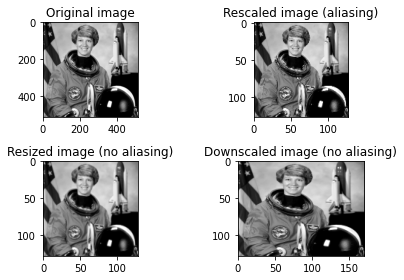

In [1]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [2]:
type(image)

numpy.ndarray

**Задание1** : загрузить свою картинку(PIL - numpy) и получить 4 варианта масштаба как в примере

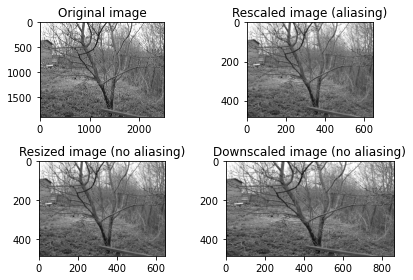

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = np.array(Image.open(r'оригинал л2.bmp'))

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 2500)
ax[0].set_ylim(1900, 0)
plt.tight_layout()
plt.show()

### **Деформация изображения**¶
Применяя геометрическое преобразование к изображению, мы обычно используем обратное отображение, т. е. для каждого пикселя в выходном изображении мы вычисляем его соответствующую позицию во входных данных. Причина в том, что если бы мы сделали это наоборот (сопоставили каждый входной пиксель с его новой выходной позицией), некоторые пиксели на выходе могли остаться пустыми. С другой стороны, каждая выходная координата имеет ровно одно соответствующее местоположение внутри (или вне) входного изображения, и даже если это положение не является целым числом, мы можем использовать интерполяцию для вычисления соответствующего значения изображения.


  - **Водоворот**¶
  - Завихрение изображения — это нелинейная деформация изображения, создающая эффект водоворота. В этом примере описывается реализация этого преобразования в skimage, а также базовый механизм деформации.



  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import skimage 
import scipy

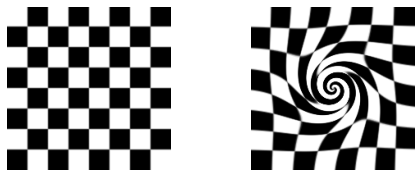

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl


image = data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

**Задание2** : загрузить свою картинку(PIL - numpy) и получить варианта swirl как в примере (установите свои параметры : 4 экземпляра примеров)

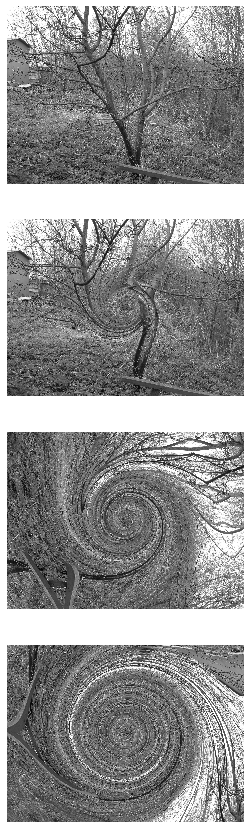

In [8]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

image = np.array(Image.open(r'оригинал л2.bmp'))
swirled1 = transform.swirl(image, rotation=0, strength=10, radius=1000)
swirled2 = transform.swirl(image, rotation=5, strength=20, radius=1500)
swirled3 = transform.swirl(image, rotation=10, strength=45, radius=1800)

fig, ax = plt.subplots(nrows = 4, figsize=(15, 15),
                               sharex=True, sharey=True)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].imshow(swirled1, cmap=plt.cm.gray)
ax[1].axis('off')
ax[2].imshow(swirled2, cmap=plt.cm.gray)
ax[2].axis('off')
ax[3].imshow(swirled3, cmap=plt.cm.gray)
ax[3].axis('off')

plt.show()

## Использование геометрических преобразований¶
В этом примере мы увидим, как использовать геометрические преобразования в контексте обработки изображений.


Поддерживается несколько различных типов геометрических преобразований: подобия, аффинные, проективные и полиномиальные. Руководство по доступным типам преобразований см . в разделе Типы гомографий .

Геометрические преобразования могут быть созданы с использованием явных параметров (например, масштаб, сдвиг, вращение и перемещение) или матрицы преобразования.

Сначала мы создаем преобразование, используя явные параметры:

In [ ]:
tform = transform.SimilarityTransform(scale=1, rotation=math.pi/2,
                                      translation=(0, 1))
print(tform.params)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


В качестве альтернативы вы можете определить преобразование по самой матрице преобразования:



In [ ]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = transform.SimilarityTransform(matrix)

Затем эти объекты преобразования можно использовать для применения прямых и обратных преобразований координат между исходной и целевой системами координат:

In [ ]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))

[[6.123234e-17 3.000000e+00]]
[[ 0.000000e+00 -6.123234e-17]]


**Задание3** : введите 4 2Д точки примените к ним трансформации разного типа (4 примера), выведите координаты точек до и после на одном графике (как в лр3)

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

tform = transform.SimilarityTransform(scale=2, rotation=math.pi/6,
                                      translation=(0, 20))
print(tform.params)

[[ 1.73205081 -1.          0.        ]
 [ 1.          1.73205081 20.        ]
 [ 0.          0.          1.        ]]


In [18]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = transform.SimilarityTransform(matrix)

In [19]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))

[[1.73205081 3.        ]]
[[5.5        7.79422863]]


## **Деформация изображения**
Геометрические преобразования также можно использовать для деформации изображений:


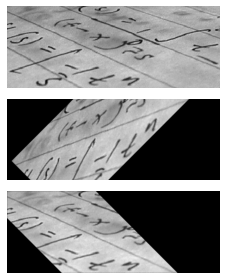

In [ ]:
text = data.text()

tform = transform.SimilarityTransform(scale=1, rotation=math.pi/4,
                                      translation=(text.shape[0]/2, -100))

rotated = transform.warp(text, tform)
back_rotated = transform.warp(rotated, tform.inverse)

fig, ax = plt.subplots(nrows=3)

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

**Задание4** : загрузить свою картинку(PIL - numpy) и получить варианта трансформаций как в примере (установите свои параметры : 4 экземпляра примеров)

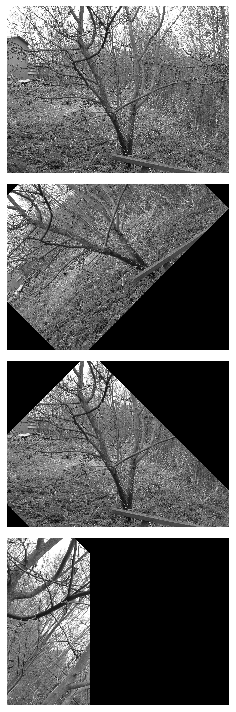

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform

tree = np.array(Image.open(r'оригинал л2.bmp'))

tform = transform.SimilarityTransform(scale=1, rotation=math.pi/4,
                                      translation=(tree.shape[0]/2, -100))

tform2 = transform.SimilarityTransform(scale=2, rotation=math.pi/2,
                                      translation=(tree.shape[0]/2, -100))

rotated = transform.warp(tree, tform)
back_rotated = transform.warp(rotated, tform.inverse)
back_rotated2 = transform.warp(rotated, tform2.inverse)
fig, ax = plt.subplots(nrows=4,figsize=(10,10))

ax[0].imshow(tree, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)
ax[3].imshow(back_rotated2, cmap=plt.cm.gray)
for a in ax:
    a.axis('off')

plt.tight_layout()